#**NOISE REDUCTION FILTER**

---
<p align="center">
  <img width="600" height="355" src="https://j.gifs.com/yEGl9X.gif">
</p>

---

##**Need of Noise Reduction**
Noise reduction is the process of removing noise from a signal. Noise reduction techniques exist for audio and images. Noise reduction algorithms may distort the signal to some degree. Noise rejection is the ability of a circuit to isolate an undesired signal component from the desired signal component, as with common-mode rejection ratio.

All signal processing devices, both analog and digital, have traits that make them susceptible to noise. Noise can be random with an even frequency distribution (white noise), or frequency-dependent noise introduced by a device's mechanism or signal processing algorithms.

<p align="center">
  <img width="600" height="355" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/Active_Noise_Reduction.svg/450px-Active_Noise_Reduction.svg.png">
</p>

---

##**IMPLEMENTATION**
In this particular we will be aiming to remove noise from BIRD AUDIO SAMPLES. The focus is to start to explore some techniques of preprocessing that can be used to improve bird detection models.

The following steps will be followed-
1. Preprocessing: To read a audio file, optionally apply signal filtering techniques, and perform feature extraction (e.g. mfccs);
2. Trainning a classification model based on features (TO DO);
3. Evaluation: To test the trainned models over a split of the dataset (TO DO).

##**FILTRATION TECHNIQUES USED**
1. Traditional log mel-spectogram;
2. High-Pass Filtering: Reduces low frequencies, once bird sound are commonly present on high frequencies

##Import the Libraries

In [1]:
# feature extractoring and preprocessing data
import librosa
import librosa.display
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from pathlib import Path
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Reports
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

##Preprocessing methods
Reading some audio samples

In [ ]:
sr = 16000
e_file1 = '/content/audio01.mp3'
e_file2 = '/content/audio02.mp3'

# 10 seconds of each file
y1,sr = librosa.load(e_file1, mono=True, sr=sr, offset=0, duration=10)
y2,sr = librosa.load(e_file2, mono=True, sr=sr, offset=0, duration=10)

In [ ]:
from IPython.display import Audio, IFrame, display

display(Audio(y1,rate=sr))
display(Audio(y2,rate=sr))

The audio samples used have high level background noises.

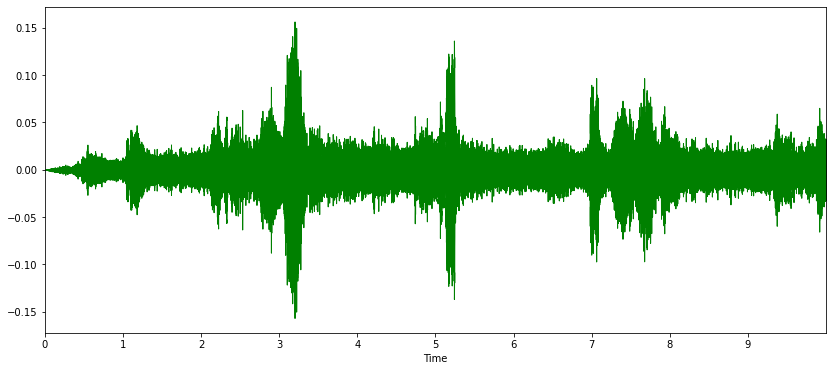

In [ ]:
librosa.display.waveplot(y1,sr=sr, color='g', x_axis='time');

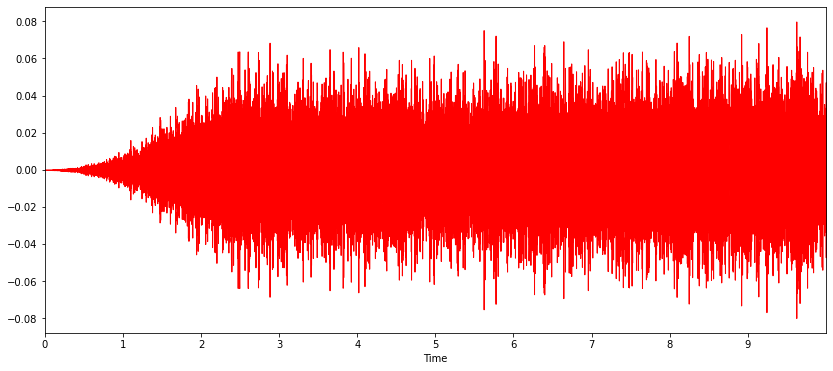

In [ ]:
librosa.display.waveplot(y2,sr=sr, color='r', x_axis='time');

##Logmel-spectogram
It is a very common preprocessing technique in audio detection applications is to transform audios to its log mel-spectogram representation

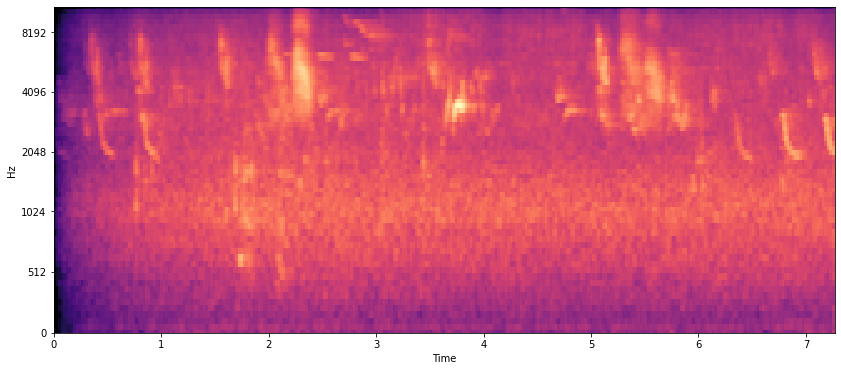

In [ ]:
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=64)
D1 = librosa.power_to_db(S1, ref=np.max)
librosa.display.specshow(D1, x_axis='time', y_axis='mel');

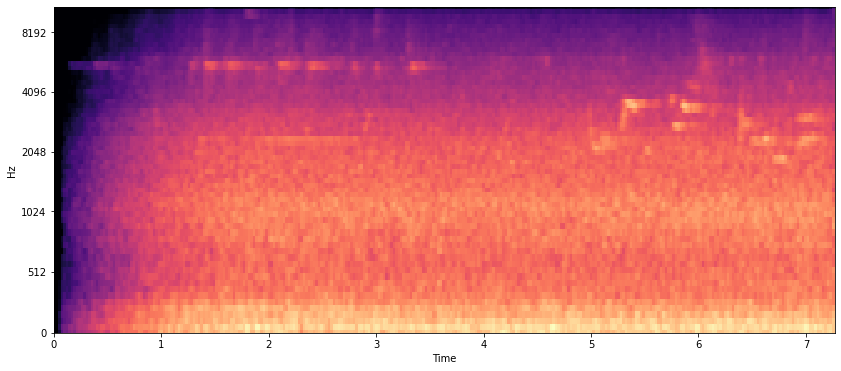

In [ ]:
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=64)
D2 = librosa.power_to_db(S2, ref=np.max)
librosa.display.specshow(D2, x_axis='time', y_axis='mel');

##Filtering low-frequencies
A low-pass filter is a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency. The exact frequency response of the filter depends on the filter design.

In [ ]:
from scipy import signal
import random


def f_high(y,sr):
    b,a = signal.butter(10, 2000/(sr/2), btype='highpass')
    yf = signal.lfilter(b,a,y)
    return yf

In [ ]:
yf1 = f_high(y1, sr)
yf2 = f_high(y2, sr)

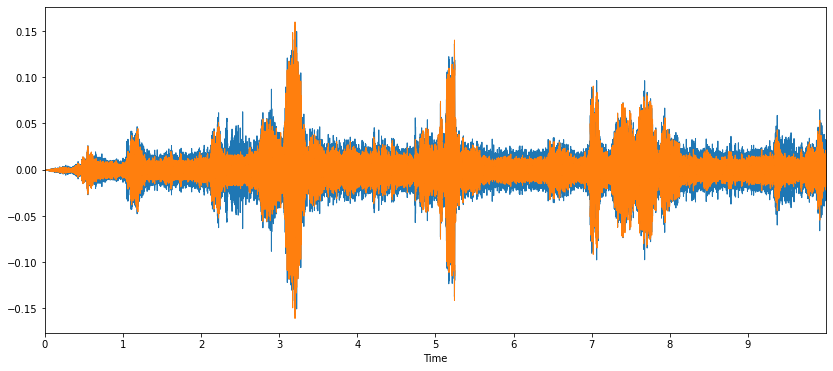

In [ ]:
librosa.display.waveplot(y1,sr=sr, colour='p', x_axis='time');
librosa.display.waveplot(yf1,sr=sr, x_axis='time');

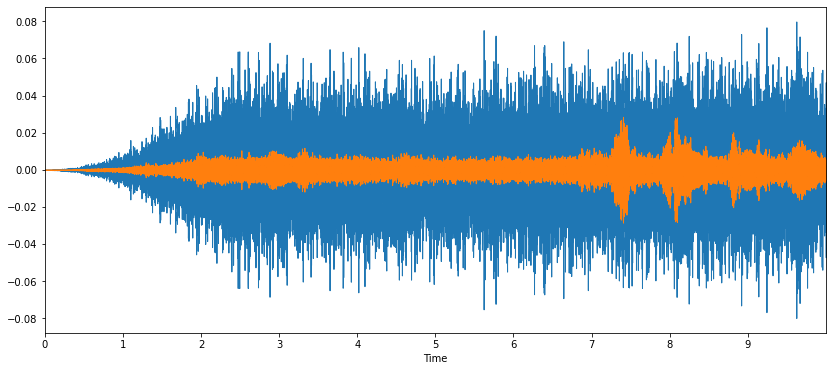

In [ ]:
librosa.display.waveplot(y2,sr=sr, x_axis='time');
librosa.display.waveplot(yf2,sr=sr, x_axis='time');


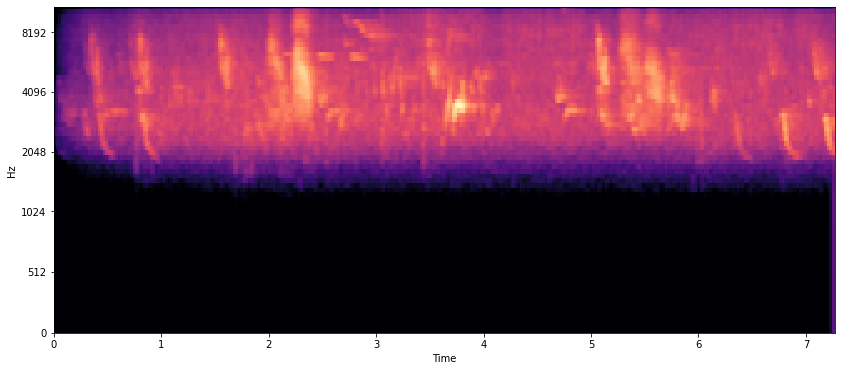

In [ ]:
Sf1 = librosa.feature.melspectrogram(y=yf1, sr=sr, n_mels=64)
Df1 = librosa.power_to_db(Sf1, ref=np.max)
librosa.display.specshow(Df1, x_axis='time', y_axis='mel');

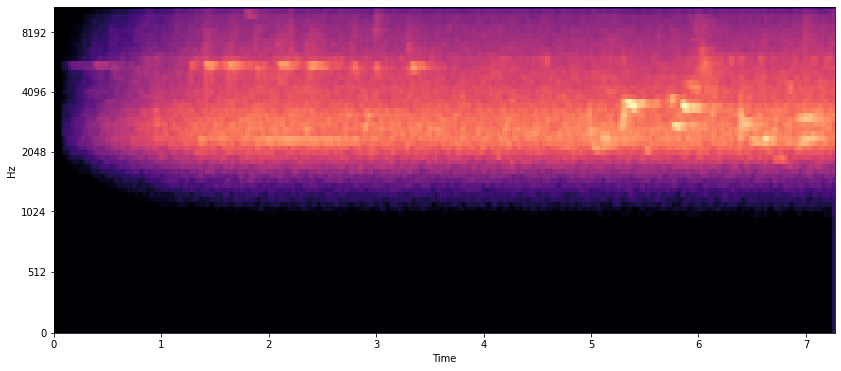

In [ ]:
Sf2 = librosa.feature.melspectrogram(y=yf2, sr=sr, n_mels=64)
Df2 = librosa.power_to_db(Sf2, ref=np.max)
librosa.display.specshow(Df2, x_axis='time', y_axis='mel');

In [ ]:
display(Audio(yf1,rate=sr))
display(Audio(yf2,rate=sr))

##**CONCLUSION**
For both audio samples, the filter helped to isolate the interesting frequencies. The first audio is in a very good quality for distincting the birds. The second audio still has some noise but significant improvements in noise reduction can be observed.

##**PACKAGE DOCUMENTATION-** https://librosa.org/doc/latest/index.html